# Hypothesis Testing

For this assignment, I will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

Use the hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats

In [2]:
! pip install pandas

In [3]:
data = 'Data/insurance - insurance.csv'
df = pd.read_csv(data)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Do smokers have higher insurance charges than non-smokers?

### State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis):There is no difference between insurance charges for smokers and non-smokers.
- $H_A$ (Alternative Hypothesis): There is a significant difference between insurance charges for snmokers and non-smokers.

- Select the correct test according to the data type and number of samples

    - Type of data: Numeric
    - How many groups/samples?: 2 Groups/samples
    - What is the appropriate test?: 2 sample T-Test

In [5]:
## check the col that contains the measurement: 'charges'
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [6]:
## check the col that contains info on 'smoker'
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [7]:
## create a column that easily separates our groups: 'smoker_yes'
df['smoker_yes'] = df['smoker'].str.contains('yes')
df['smoker_yes'].value_counts()

False    1064
True      274
Name: smoker_yes, dtype: int64

In [8]:
## save list of columns needed for each group
needed_cols = ['smoker_yes','charges']

df[needed_cols]

,smoker_yes,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [9]:
## save male team in separate variable
non_smoker_df = df.loc[ df['smoker_yes']== False, needed_cols]
non_smoker_df

,smoker_yes,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [10]:
## save male team in separate variable
smoker_df = df.loc[ df['smoker_yes']== True, needed_cols]
smoker_df

,smoker_yes,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [11]:
## Make a df just for visualization by concat the groups 
plot_df = pd.concat([smoker_df,non_smoker_df])
plot_df

,smoker_yes,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


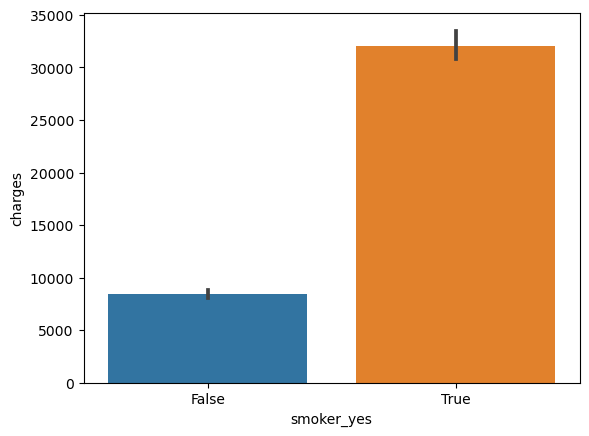

In [12]:
## visualize the group means
sns.barplot(data=plot_df, x='smoker_yes',y='charges')
plt.savefig('Data/smoker_charges.png')

![Smoker v/s Insurance Charges](Data/smoker_charges.png)

### Test the assumptions of your selected test.
- No significant outliers
- Normality
- Equal Variance


#### Assumption: No significant outliers

In [13]:
# Checking Assumption of No Significant Outliers
## Saving JUST the numeric col as final group variables
smoker_group = smoker_df['charges']
non_smoker_group = non_smoker_df['charges']
smoker_group


0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [14]:
## Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
print(f'There are {smoker_outliers.sum()} outlier in the smokers group.')

There are 0 outlier in the smokers group.


In [15]:
## Check non_smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
print(f'There are {non_smoker_outliers.sum()} outlier in the non-smokers group.')

There are 24 outlier in the non-smokers group.


##### Removing outliers

In [16]:
## remove outliers from non_smoker_group
non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

#### Assumption: Normally Distributed Groups

In [17]:
## Check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue


5.564930630036463e-14

In [18]:
## Check n for smoker group
len(smoker_group)

274

In [19]:
## Check non-smoker group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue


2.6945416315543976e-36

In [20]:
## Check n for non-smoker group
len(non_smoker_group)

1040

- Did we meet the assumption of normality?
    - We have large enough groups that we can safely disregard the assumption of normality.



#### Assumption: Equal Variance

In [21]:
## use Levene's test to check if groups have equal variance
rseult = stats.levene(smoker_group, non_smoker_group)
print(result)

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)


In [22]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- Did we meet the assumption of equal variance?
    - We met the assumption of normality but did NOT meet the assumption of equal variance.
    - We will therefore run a Welch's t-test instead by adding equal_var=False to stats.ttest_ind



###  Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [23]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)


True

In [24]:
smoker_group.mean()

32050.23183153284

In [25]:
non_smoker_group.mean()

7939.8608446721155

### Interpret your p-value and reject or fail to reject your null hypothesis 

- We had a p-value < .05 for our welch's t-test. We reject the null hypothesis and support the alternative that smokers pay higher insurance charges.

### Show a supporting visualization that helps display the result

<Axes: xlabel='smoker', ylabel='charges'>

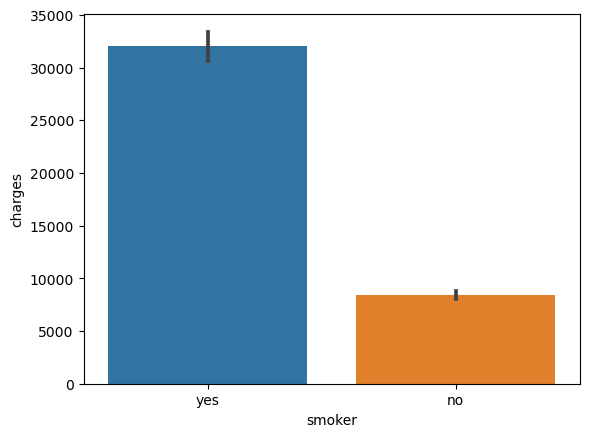

In [26]:
## Add a summary visual to support our results.
sns.barplot(data=df, x='smoker',y='charges')

## 2. Are men more likely to smoke than women?

###  State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no differnce between gender and the likeliness to smoke.
- $H_A$ (Alternative Hypothesis): There is a significant difference between gender and the likeliness to smoke.

###  Select the correct test according to the data type and number of samples

- Type of data: Categorical
- How many groups/samples?: 2 Groups/samples
- What is the appropriate test?: Chi-Square

#### Visualize and separate data for hypothesis
- What column is our target?
    - smoker
- What column determines our groups?
    - sex

In [27]:
df['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [28]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

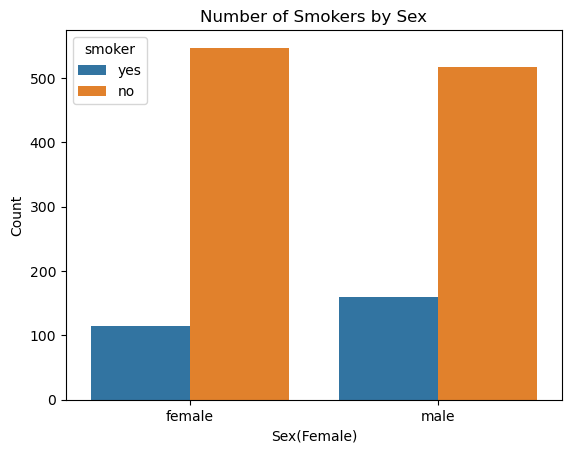

In [29]:
## visualize the group means
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title('Number of Smokers by Sex')
ax.set_xlabel('Sex(Female)')
ax.set_ylabel('Count');

### Test the assumptions of your selected test.
- There are two categorical variables (ordinal or nominal)
- The outcomes are independent

#### Assumption: the outcomes are independent

In [30]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [32]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- Since our p < .05, we reject the null hypothesis that there is no differnce between gender and the likeliness to smoke.

## 3. Do different regions have different charges, on average?

In [33]:
df['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [34]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### State Null Hypothesis and Alternative Hypothesis

- $H_0$ (Null Hypothesis): There is no difference based on regions and charges
- $H_A$ (Alternative Hypothesis): There is a significant difference based on region and charges

- Select the correct test according to the data type and number of samples

    - Type of data: Numeric
    - How many groups/samples?: 4 Groups/samples
    - What is the appropriate test?: ANOVA (each group has n>15)

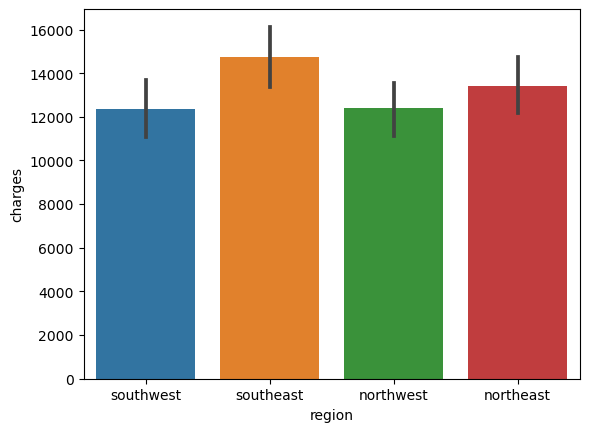

In [35]:
sns.barplot(data=df, x='region',y='charges');

In [36]:
#Checking the size of the group
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [37]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
region_group = {}
## Loop through all unique categories
for i in df["region"].unique():
    ## Get series for group and rename
    data = df.loc[df["region"] == i, "charges"].copy()
    
    # save into the dictionary
    region_group[i] = data
region_group.keys()  

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Test the assumptions of your selected test.
- No significant outliers
- Equal variance
- Normality

#### Assumption: No significant outliers

##### Removing outliers

In [98]:
## remove outliers from other region groups
se_group = se_group.loc[~se_outliers]
nw_group = nw_group.loc[~nw_outliers]
ne_group = ne_group.loc[~ne_outliers]

In [38]:
## Loop through groups dict
for i, data in region_group.items():

    ## determine if there are any outliers
    outliers = np.abs(stats.zscore(data)) > 3
    
    ## print a statement about how many outliers for which group name
    print(f"There were {outliers.sum()} outliers in the {i} group.")

    ## Remove the outiers from data and overwrite the sector data in the dict
    data = data.loc[~outliers]
    region_group[i] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


#### Normality

In [40]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [41]:

## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [42]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- The pvalues are less then 0.05, hence the Normality assumption is NOT met. However, I can safely ignore this since n>15 for each group. 
- Hence, I can conclude that the assumptions for normality has met.

#### Assumption: Equal Variance

In [43]:
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- The pvalue is less than 0.05, hence the Equal Variance Assumption is NOT met.
- Hence, we reject the null hypothesis.

###  Execute the selected test: Kruskal-Wallis Test

In [47]:
# Perform Kruskal-Wallis test
result = stats.kruskal(*region_group.values())

print(f"Kruskal Result: statistic={h_statistic}, pvalue={p_value}")



Kruskal Result: statistic=6.914045702545643, pvalue=0.07468847911322242


In [50]:
#Interpret the result
if result.pvalue < .05:
    print(f"There is no difference in charges based on regions")
else:
    print(f"There is a significant difference in charges based on regions.")

There is a significant difference in charges based on regions.


In [51]:
## Use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"Reject Null Hypothesis.")
else:
    print(f"Fail to Reject Null Hypothesis.")

Fail to Reject Null Hypothesis.


### Interpret your p-value and reject or fail to reject your null hypothesis 

- pvalue is greater than 0.05 hence, I fail to reject the null hypothesis: There is a significant difference in charges based on region.

### Show a supporting visualization that helps display the result

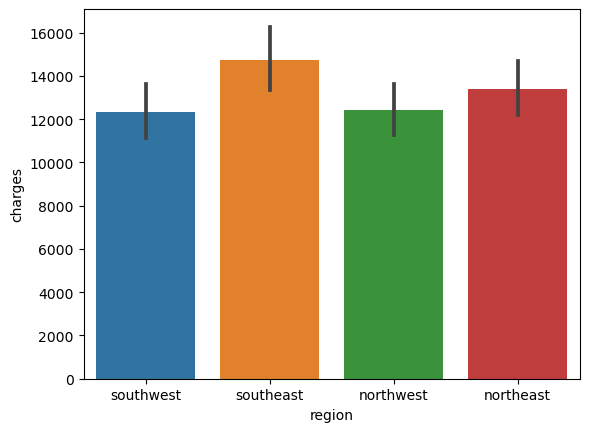

In [52]:
sns.barplot(data=df, x='region',y='charges');